In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv(r"C:\Prodigy Infotech\titanic\train.csv")

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.shape

(891, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df['Age'].fillna(df['Age'].median(), inplace=True)


In [17]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [18]:
df.drop('Cabin', axis=1, inplace=True)

In [19]:
print(df.isna().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Exploratory Data Analysis

## Univariate Analysis

### Distribution of the 'Survived'

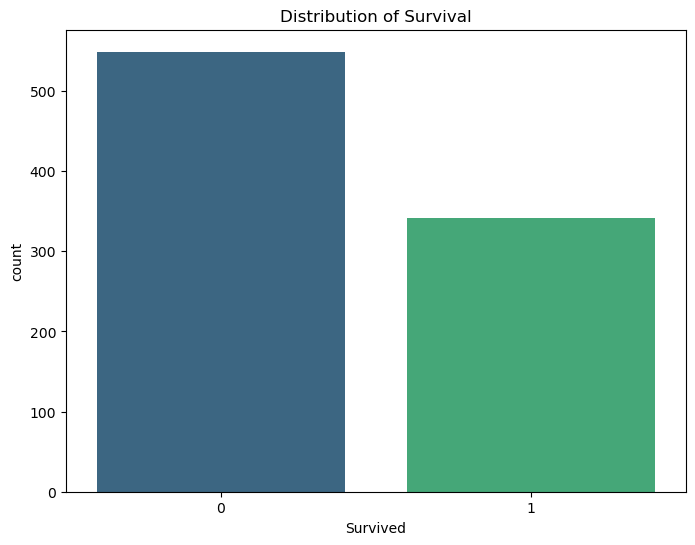

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Distribution of Survival')
plt.show()

### Distribution of 'Pclass'

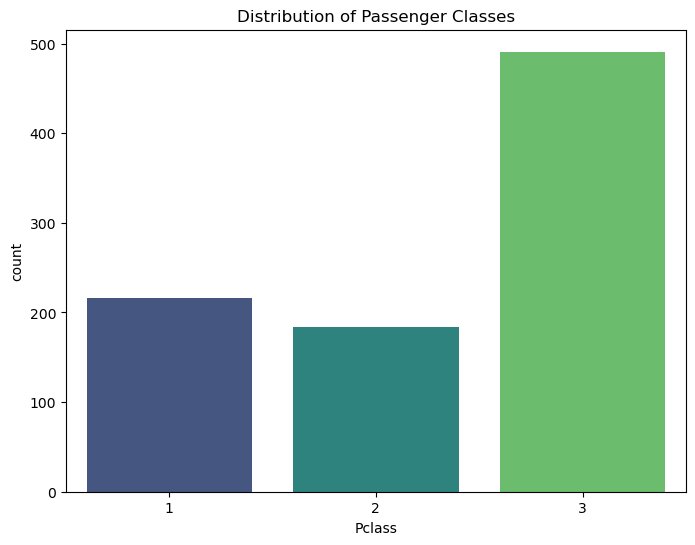

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df, palette='viridis')
plt.title('Distribution of Passenger Classes')
plt.show()

### Distribution of 'Age'

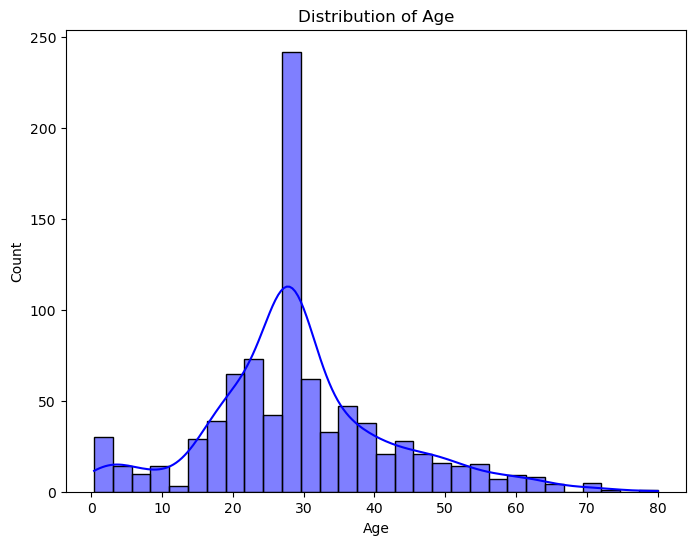

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.show()

## Bivariate Analysis

### Survival rate by 'Pclass'

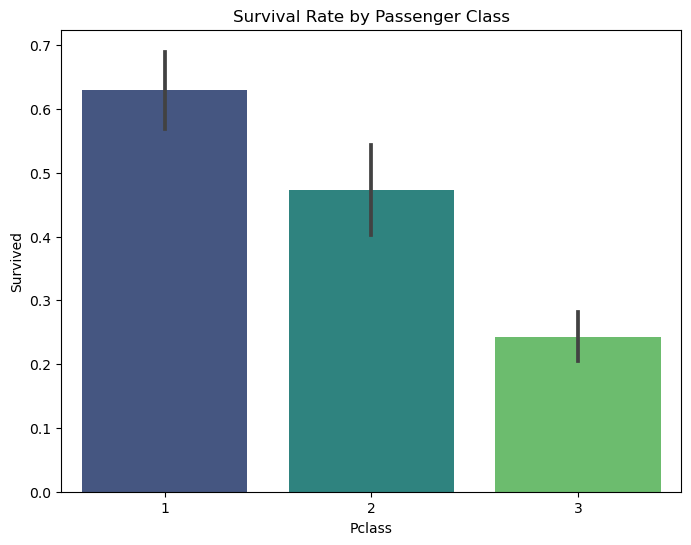

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.show()

### Survival rate by 'Sex'

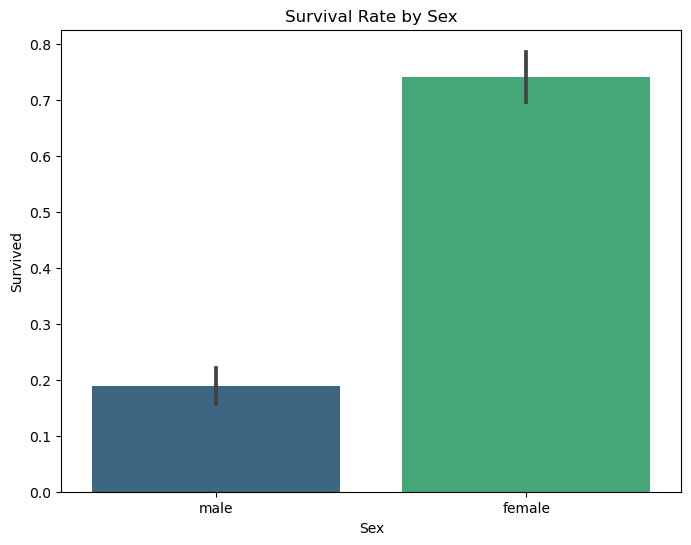

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Sex')
plt.show()

### Survival rate by 'Embarked'

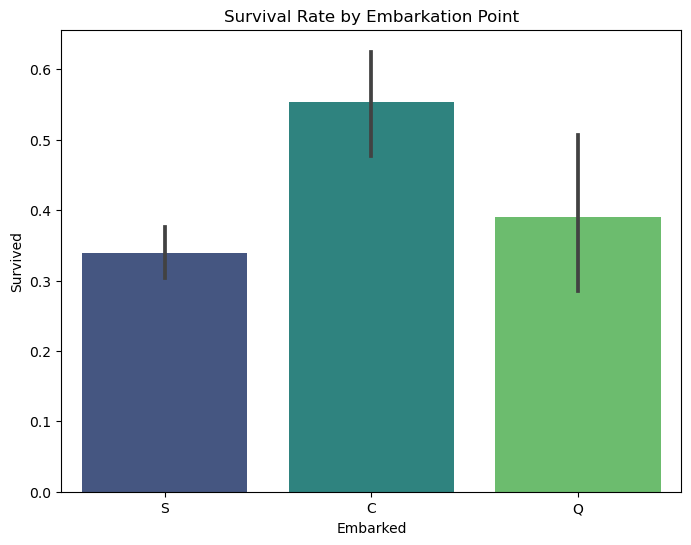

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Embarkation Point')
plt.show()

### Survival rate by 'Age'

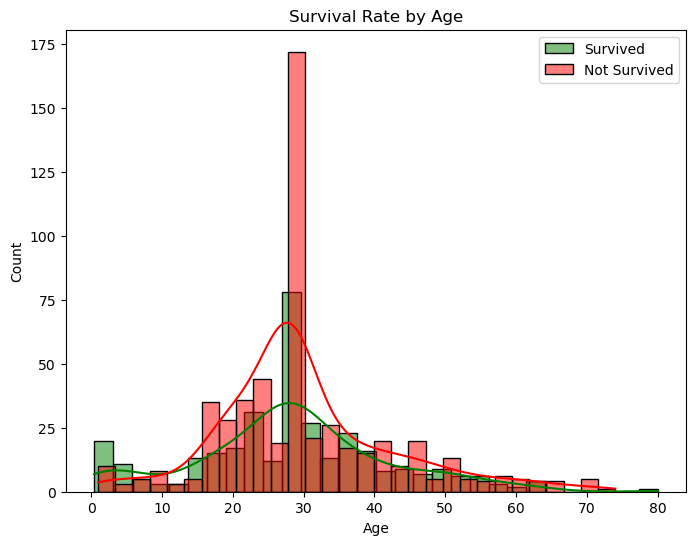

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Not Survived')
plt.title('Survival Rate by Age')
plt.legend()
plt.show()

## Multivariate Analysis

### Pairplot of some variables

<Figure size 1200x1000 with 0 Axes>

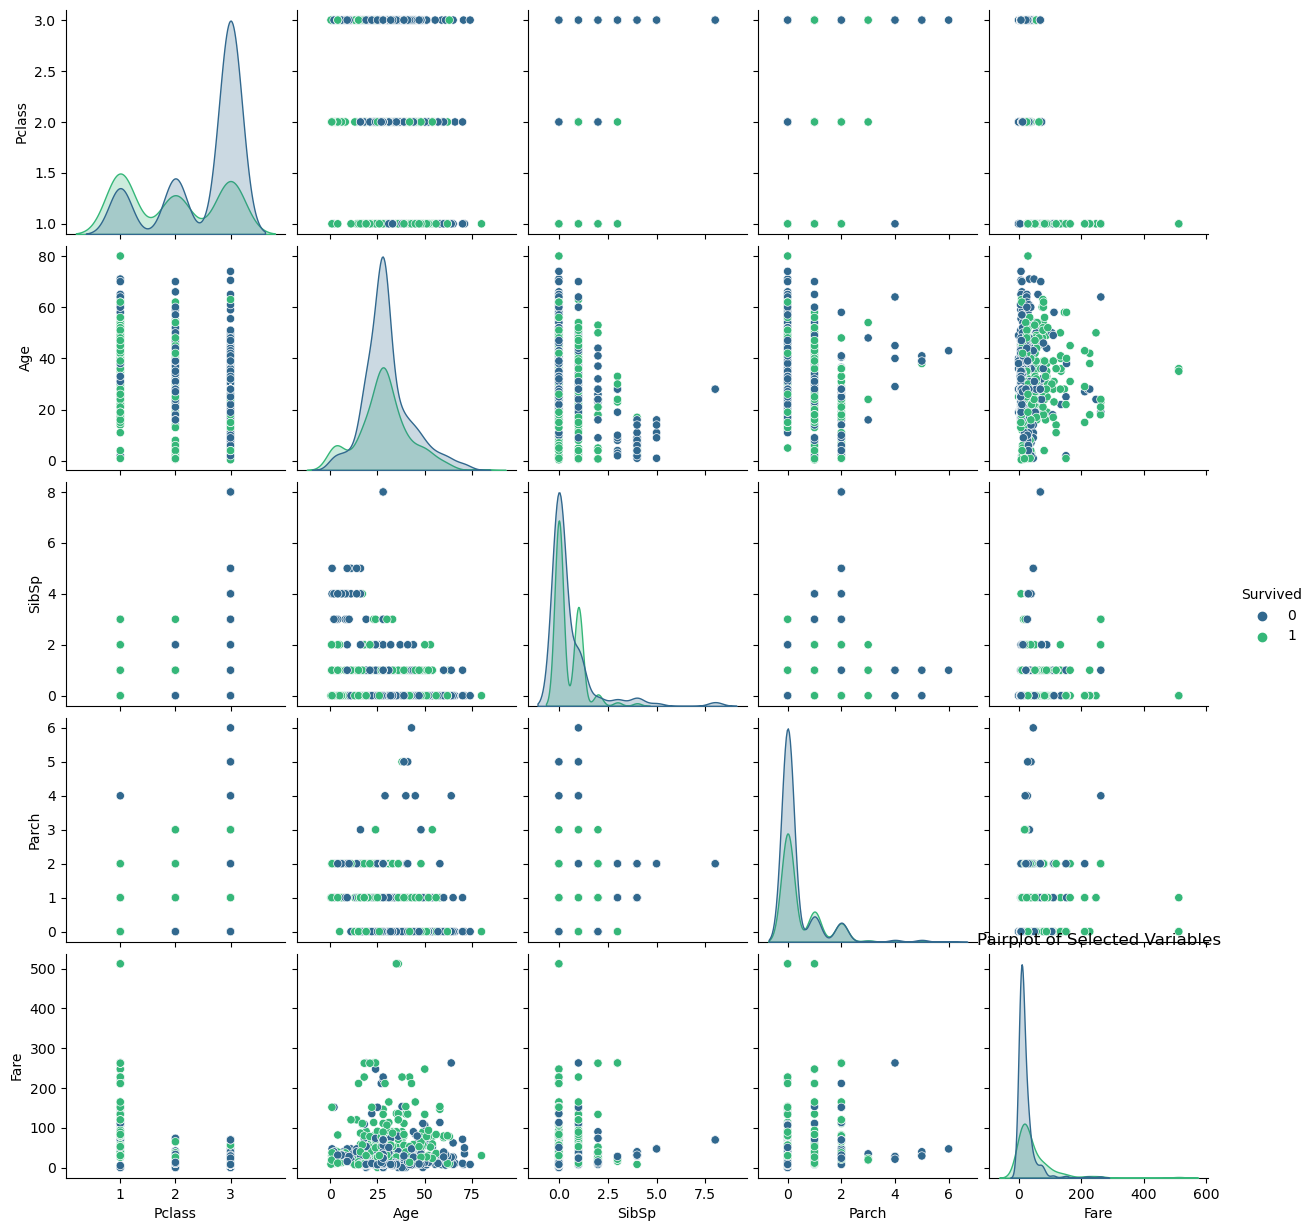

In [28]:
plt.figure(figsize=(12, 10))
sns.pairplot(df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived', palette='viridis')
plt.title('Pairplot of Selected Variables')
plt.show()

### Heatmap of correlation between numerical variables

C:\Users\HP\AppData\Local\Temp\ipykernel_3964\1788732398.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


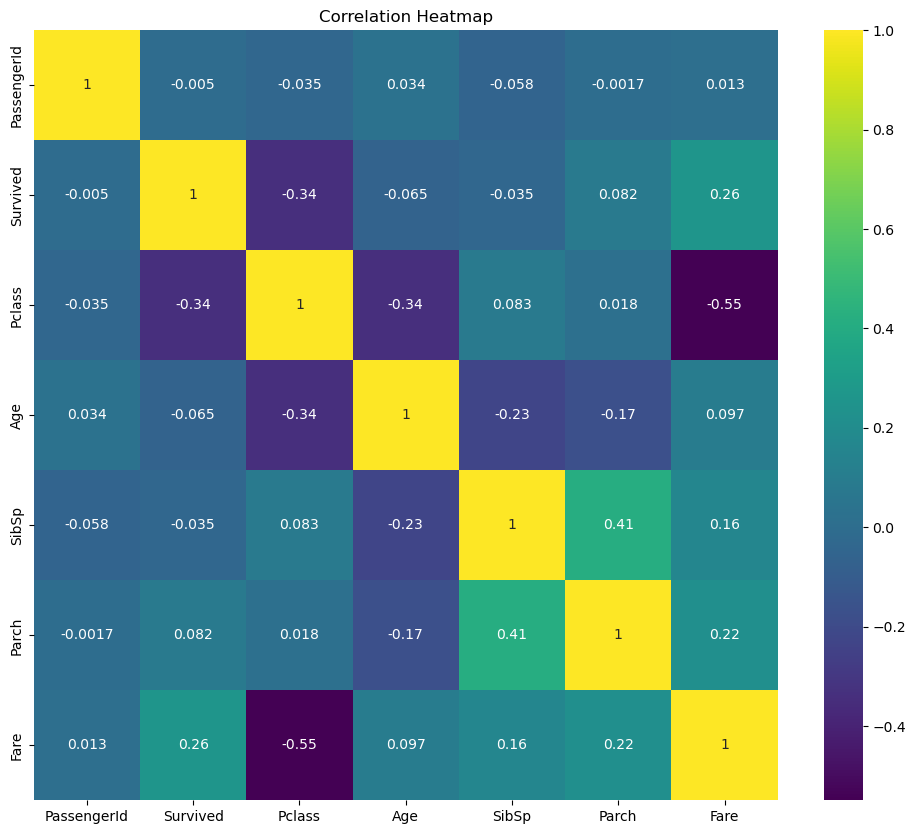

In [29]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

### Checking survival rate with respect to SibSp and Parch

<Figure size 1200x600 with 0 Axes>

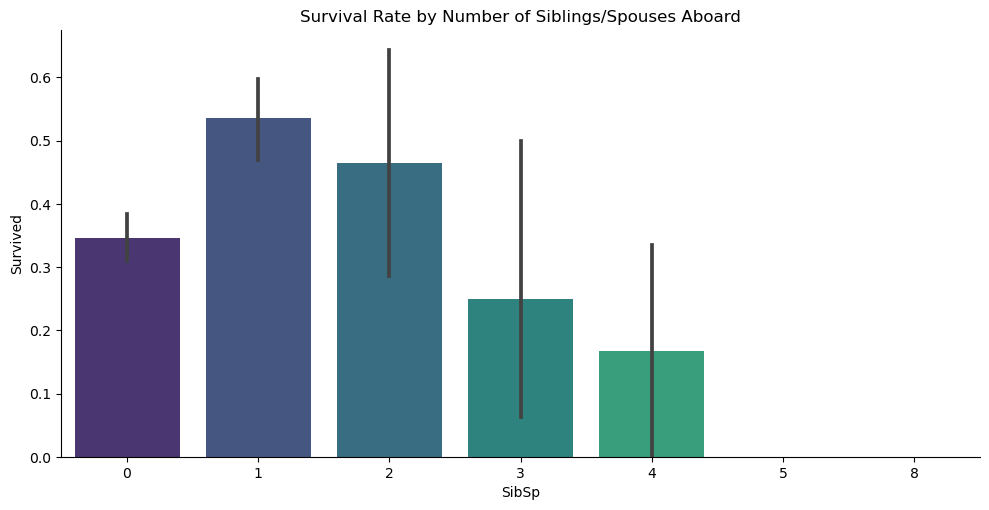

In [31]:
plt.figure(figsize=(12, 6))
sns.catplot(x='SibSp', y='Survived', data=df, kind='bar', height=5, aspect=2, palette='viridis')
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.show()

<Figure size 1200x600 with 0 Axes>

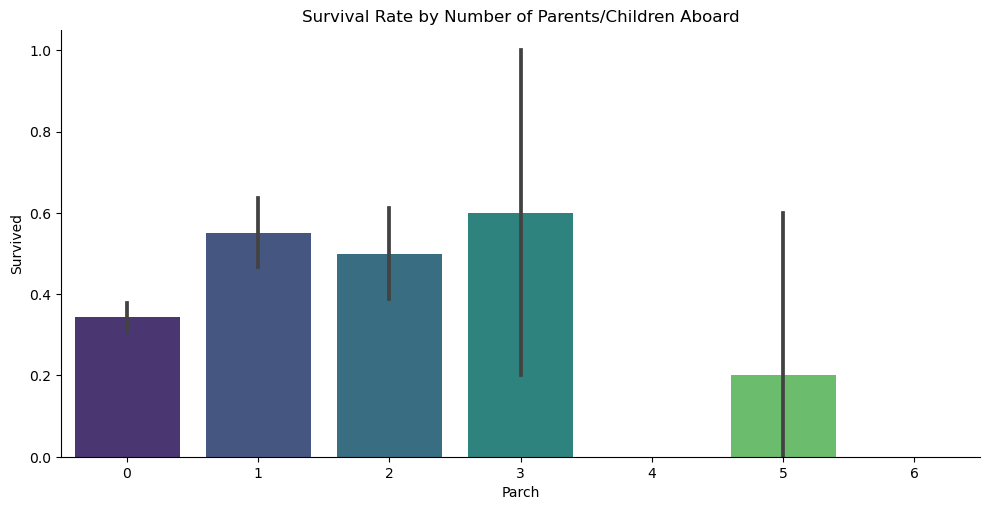

In [32]:
plt.figure(figsize=(12, 6))
sns.catplot(x='Parch', y='Survived', data=df, kind='bar', height=5, aspect=2, palette='viridis')
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.show()